## **Data Collection**



**Loading Data**

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Advertising.csv')

In [3]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


## **DATA PREPROCESSING**



**Data Cleaning**

In [5]:
data.duplicated().sum()

0

In [6]:
data.isnull()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [7]:
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [8]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [9]:
data.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

**Outlier Detection and Removal**

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [11]:
def boxplot(str,column):
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=data[column])
    plt.title(f'Box Plot of {column} {str}')
    plt.show()

Before Outlier Removing:  Unnamed: 0


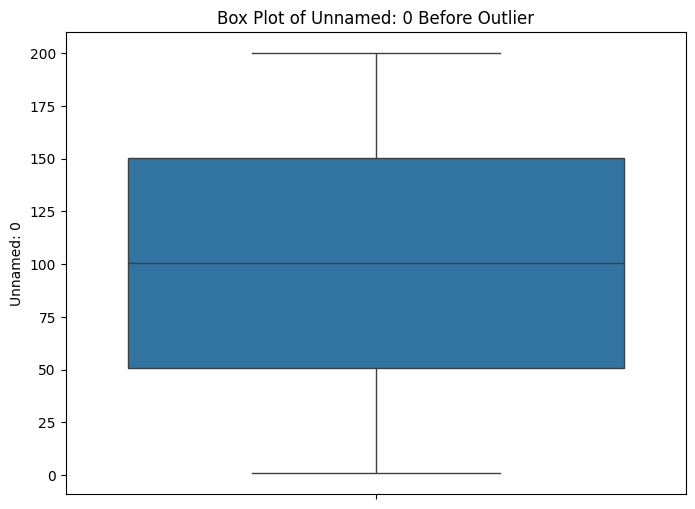

After Outlier Removing:  Unnamed: 0


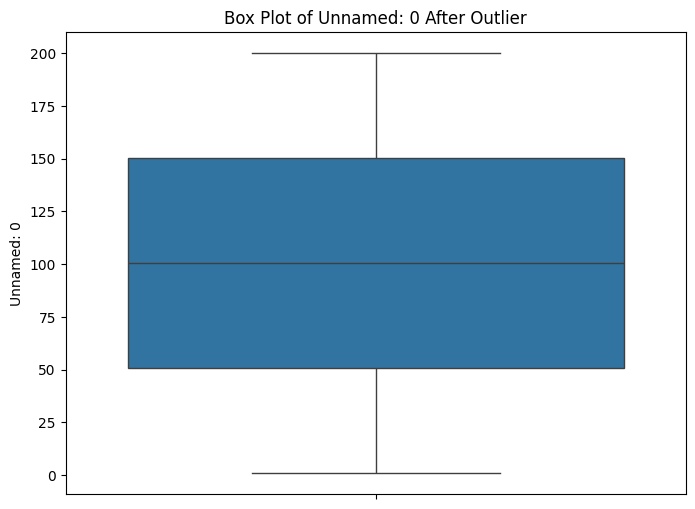

Before Outlier Removing:  TV


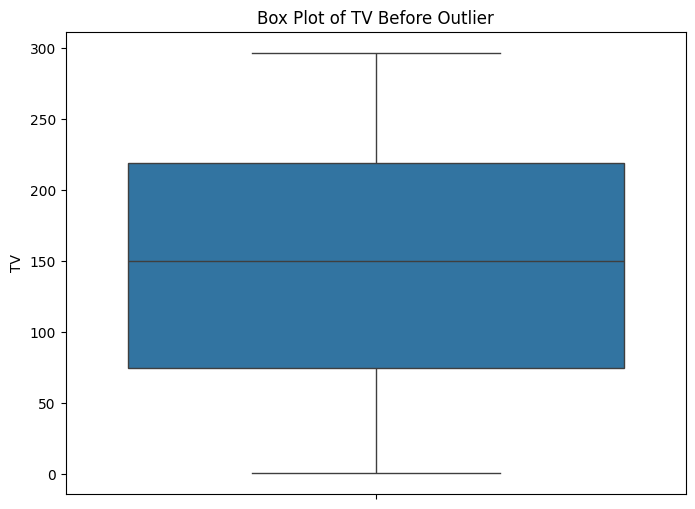

After Outlier Removing:  TV


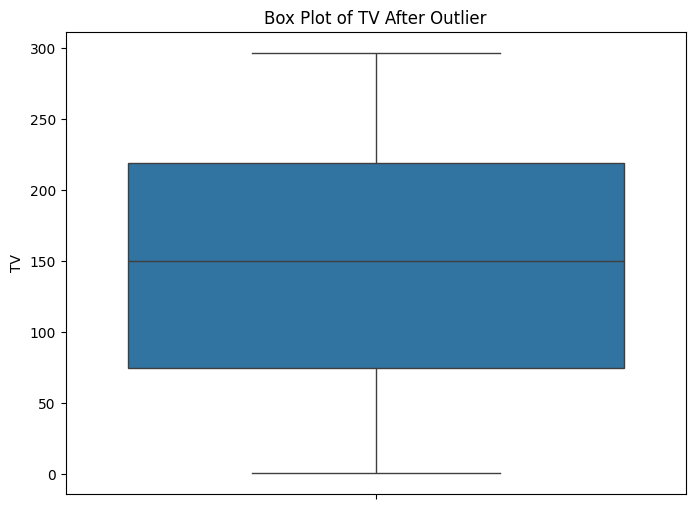

Before Outlier Removing:  Radio


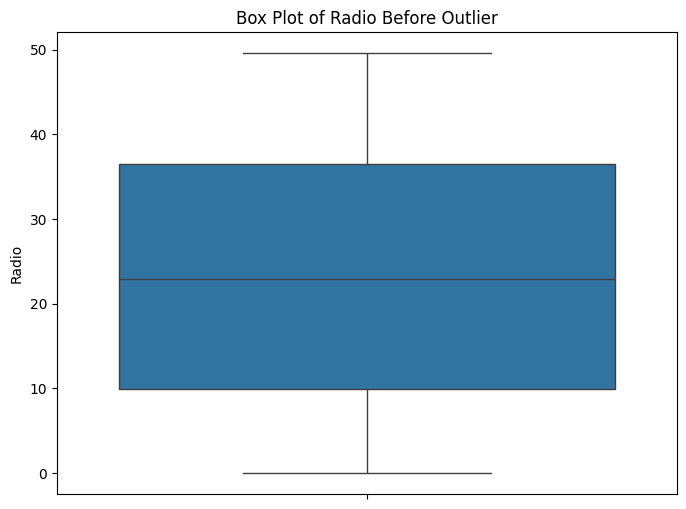

After Outlier Removing:  Radio


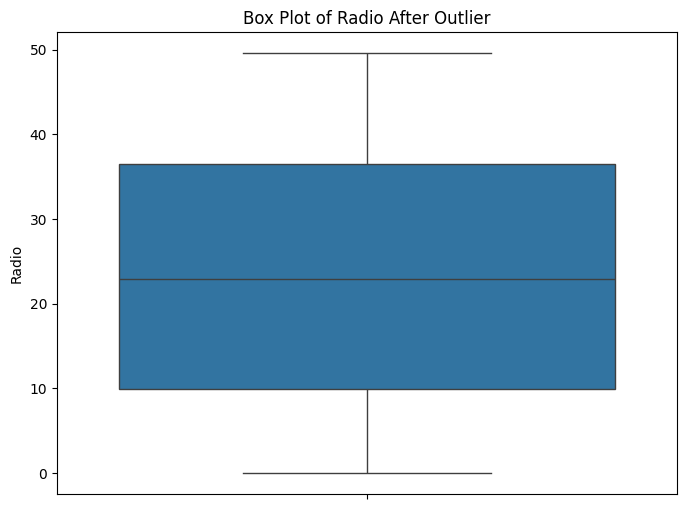

Before Outlier Removing:  Newspaper


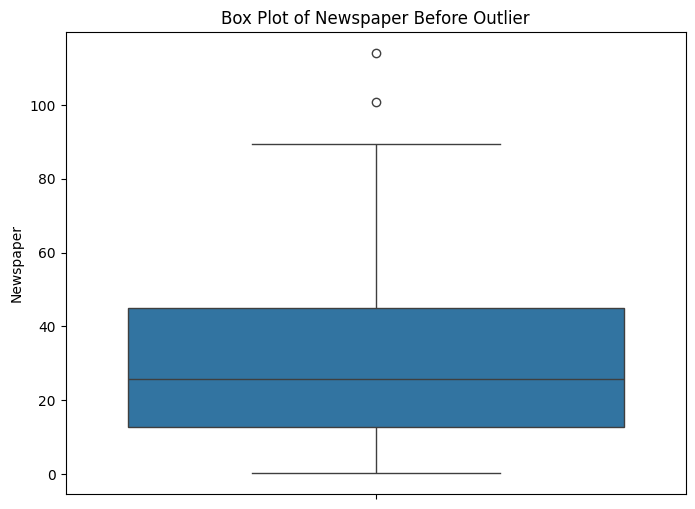

After Outlier Removing:  Newspaper


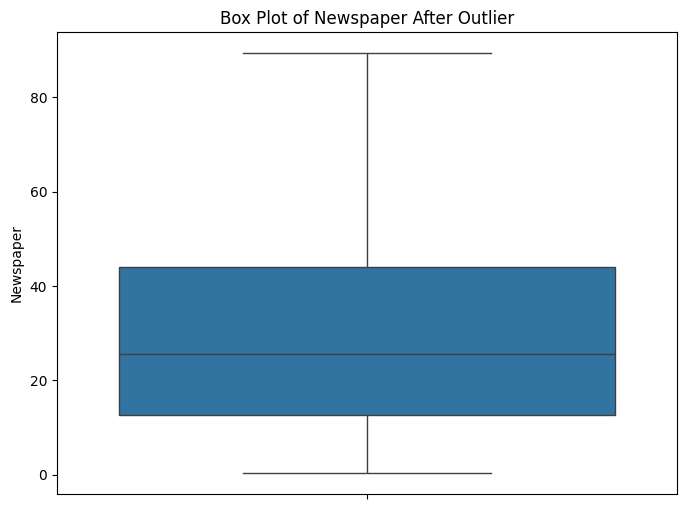

Before Outlier Removing:  Sales


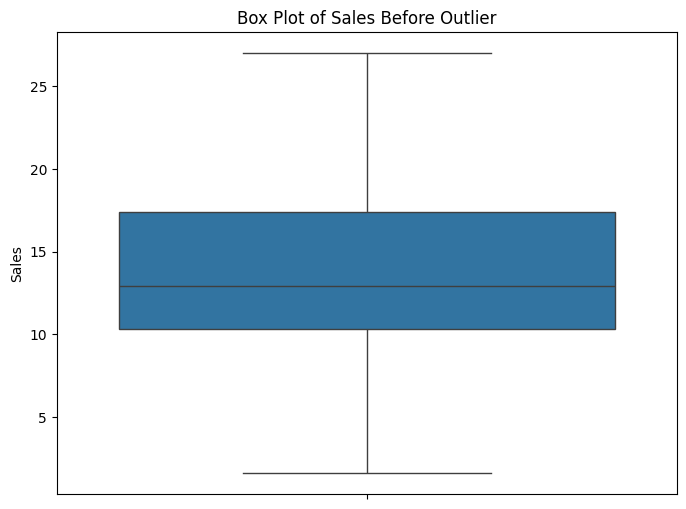

After Outlier Removing:  Sales


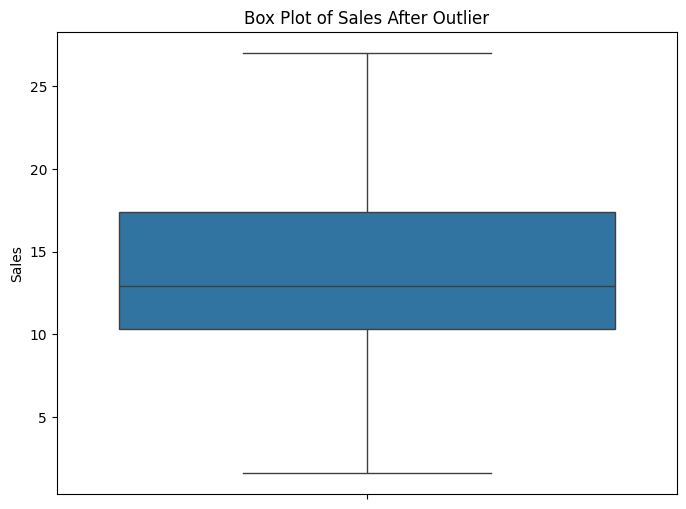

In [12]:
for column in data:

    print("Before Outlier Removing: ",column)

    boxplot('Before Outlier',column)

    print("After Outlier Removing: ",column)

    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    data = data.loc[(data[column] > lower_bound) & (data[column] < upper_bound)]

    boxplot('After Outlier',column)



In [13]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  198 non-null    int64  
 1   TV          198 non-null    float64
 2   Radio       198 non-null    float64
 3   Newspaper   198 non-null    float64
 4   Sales       198 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 9.3 KB


## **DATA VISUALIZATION**

**Sales Vs  TV**


Text(0, 0.5, 'Sales')

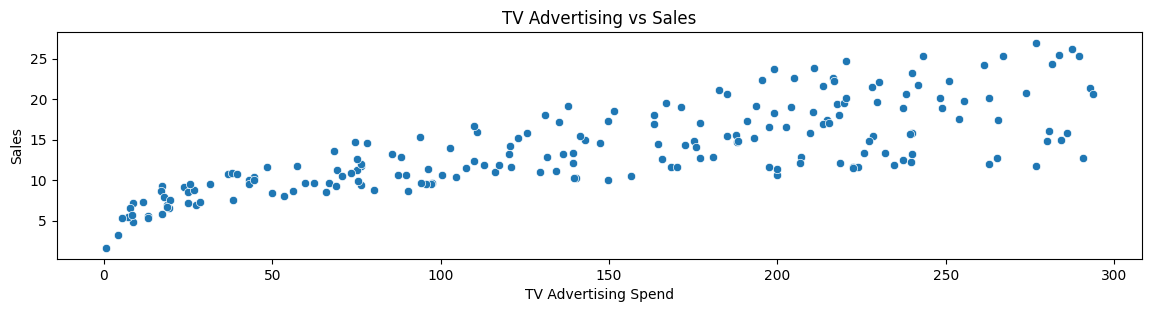

In [15]:
# Plot TV vs Sales
plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
sns.scatterplot(data=data, x='TV', y='Sales')
plt.title('TV Advertising vs Sales')
plt.xlabel('TV Advertising Spend')
plt.ylabel('Sales')

**Radio vs Sales**


Text(0, 0.5, 'Sales')

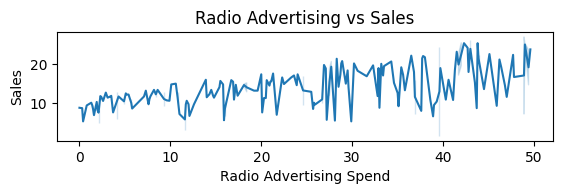

In [16]:
# Plot Radio vs Sales
plt.subplot(3, 1, 2)
sns.lineplot(data=data, x='Radio', y='Sales')
plt.title('Radio Advertising vs Sales')
plt.xlabel('Radio Advertising Spend')
plt.ylabel('Sales')

**Newspaper vs Sales**

Text(0, 0.5, 'Sales')

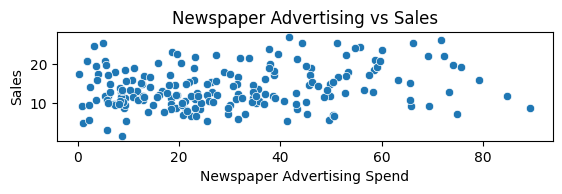

In [17]:
# Plot Newspaper vs Sales
plt.subplot(3, 1, 3)
sns.scatterplot(data=data, x='Newspaper', y='Sales')
plt.title('Newspaper Advertising vs Sales')
plt.xlabel('Newspaper Advertising Spend')
plt.ylabel('Sales')

**Correlation Matrix**

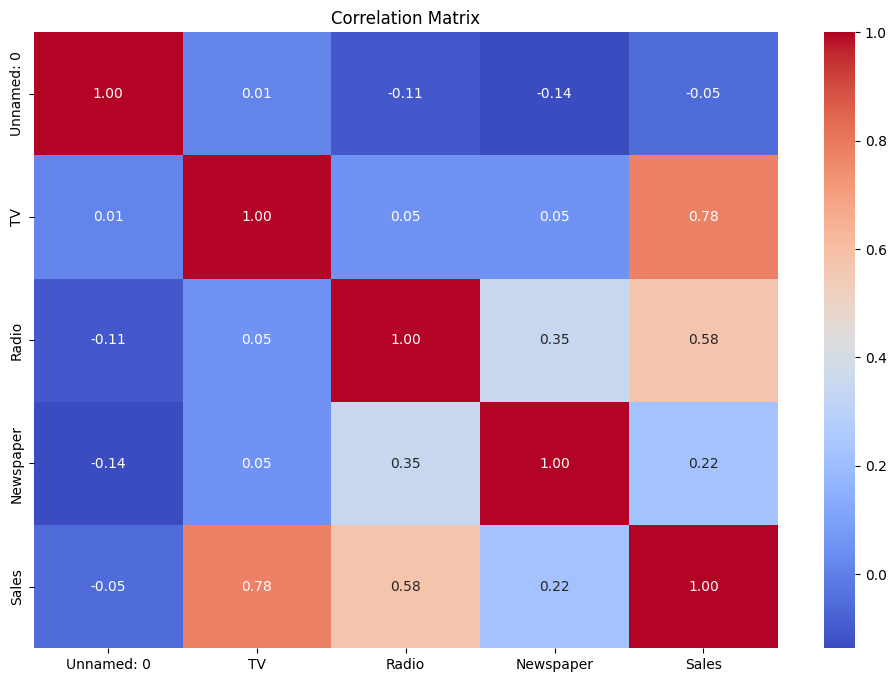

In [18]:
# Select only numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## **FEATURE ENGINEERING**

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scalerx = StandardScaler()
scalery = StandardScaler()

### **MODEL SELECTION**

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,precision_recall_curve, roc_curve, roc_auc_score,auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [74]:
# Prepare the data for modeling
X = data.drop(['Sales','Unnamed: 0'], axis=1)
y = data['Sales']

**Standard Scaler**

In [75]:
X = scalerx.fit_transform(X)

In [76]:

# Convert the y to a NumPy array
y_array = y.values

# Reshape the NumPy array to a 2D array with one column
y_reshaped = y_array.reshape(-1, 1)

# Use the reshaped array for fitting and transforming
y = scalery.fit_transform(y_reshaped)


In [77]:
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [78]:
X

array([[ 0.97869734,  0.98952135,  1.93299778],
       [-1.19901165,  1.09070498,  0.75131275],
       [-1.51933199,  1.53591293,  1.93790103],
       [ 0.05645636,  1.22561648,  1.40834924],
       [ 0.40024339, -0.83178391,  1.40344598],
       [-1.61906543,  1.73828018,  2.2173867 ],
       [-1.04647815,  0.6522426 , -0.30779084],
       [-0.31079737, -0.23817331, -0.89127846],
       [-1.62023876, -1.41864895, -1.41102374],
       [ 0.62317696, -1.38492107, -0.42056576],
       [-0.94557138, -1.16906267, -0.27346804],
       [ 0.79800381,  0.05863199, -1.26392602],
       [-1.44189191,  0.80739083,  1.77119028],
       [-0.57714432, -1.04764232, -1.10702179],
       [ 0.67363035,  0.65898817,  0.79544207],
       [ 0.57155024,  1.65733328,  1.13376683],
       [ 1.58061798,  1.1109417 ,  1.27596129],
       [-0.90919801, -0.17746313, -0.56276022],
       [ 0.0071763 ,  0.05188642, -0.52353416],
       [ 0.84141719,  0.30821827,  1.15828311],
       [ 1.06435076, -1.21628169, -0.307

In [79]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Linear Regression**

In [80]:
# Initialize the models
linear_model = LinearRegression()

# Train the models
linear_model.fit(X_train, y_train)

# Make predictions
y_linear_pred = linear_model.predict(X_test)


In [81]:
y_linear_pred

array([[-0.97979651],
       [-0.37965548],
       [ 1.78095878],
       [-0.97566991],
       [-0.67789475],
       [ 1.52738778],
       [ 1.00687996],
       [-0.48742086],
       [ 0.02253661],
       [ 0.73766566],
       [ 0.04962286],
       [ 1.31270799],
       [-1.02966796],
       [-0.24215648],
       [-1.41326146],
       [-0.95662762],
       [-0.63629213],
       [-0.26684644],
       [-0.80447549],
       [-0.47337079],
       [-0.18420284],
       [ 0.60648331],
       [ 1.71357842],
       [-1.51075362],
       [ 0.61815095],
       [ 1.34072333],
       [-1.14577838],
       [ 0.12599563],
       [-1.36847106],
       [-0.32853535],
       [ 0.72941601],
       [-0.05422203],
       [-1.4137023 ],
       [ 0.07500508],
       [ 0.31381052],
       [ 0.81457571],
       [ 0.25141945],
       [-0.39067128],
       [ 0.81008589],
       [ 0.43559514]])

In [82]:
# Evaluate the models
mse_lr = mean_squared_error(y_test, y_linear_pred)

r2_lr = r2_score(y_test, y_linear_pred)

# Display the results
print(f'Linear Regression - MSE: {mse_lr}, R2: {r2_lr}')

Linear Regression - MSE: 0.10203272795797011, R2: 0.8989454779619588


**Residual Plot**

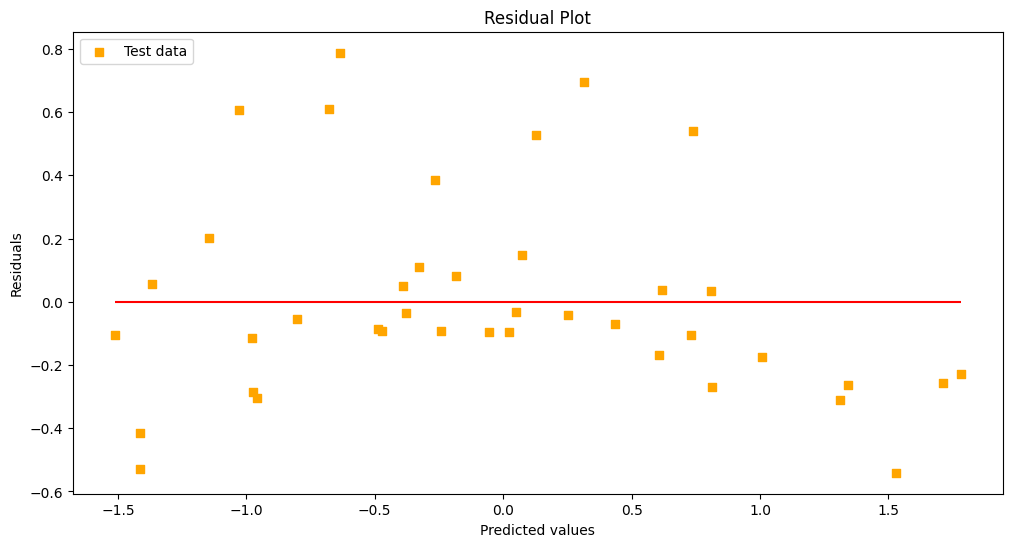

In [83]:
# Residual plot
plt.figure(figsize=(12, 6))
plt.scatter(y_linear_pred, y_linear_pred - y_test, c='orange', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=y_linear_pred.min(), xmax=y_linear_pred.max(), color='red')
plt.title('Residual Plot')
plt.show()

**Predicted vs Actual plot**

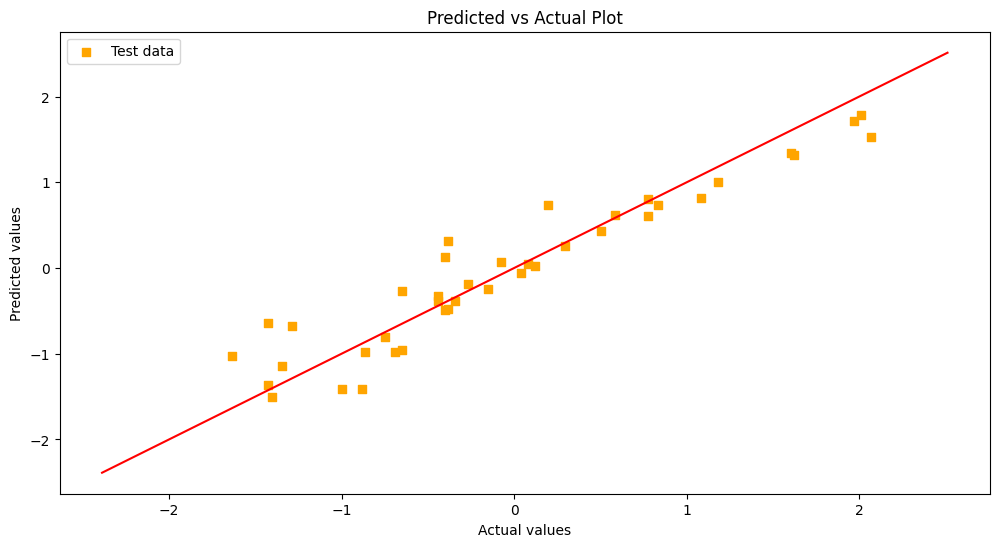

In [84]:
# Predicted vs Actual plot
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_linear_pred, c='orange', marker='s', label='Test data')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend(loc='upper left')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.title('Predicted vs Actual Plot')
plt.show()

# **Decision Tree Regressor**

In [85]:
decision_model = DecisionTreeRegressor()

decision_model.fit(X_train, y_train)

y_decision_pred = decision_model.predict(X_test)

In [86]:
y_decision_pred

array([-0.99958496, -0.20853108,  2.22251256, -0.82593899, -1.61699287,
        1.89451461,  1.08416673, -0.30500107,  0.17734886,  0.15805487,
       -0.20853108,  1.87522061, -1.61699287, -0.11206109, -1.01887896,
       -0.63299902, -1.61699287, -0.47864704, -0.84523299, -0.42076505,
       -0.13135509,  0.64040479,  2.20321856, -1.23111293,  0.65969879,
        1.48934067, -1.23111293, -0.32429506, -1.23111293, -0.20853108,
        0.94910875,  0.19664286, -0.90311498, -0.51723504, -0.24711907,
        0.87193276,  0.50534681, -0.20853108,  0.94910875,  0.37028883])

In [87]:
y_decision_pred= y_decision_pred.reshape(-1,1)

In [88]:
mse_dt = mean_squared_error(y_test, y_decision_pred)

r2_dt = r2_score(y_test, y_decision_pred)


print(f'Decision Tree - MSE: {mse_dt}, R2: {r2_dt}')

Decision Tree - MSE: 0.030245989031426078, R2: 0.9700439846477725


**Residual PLot**

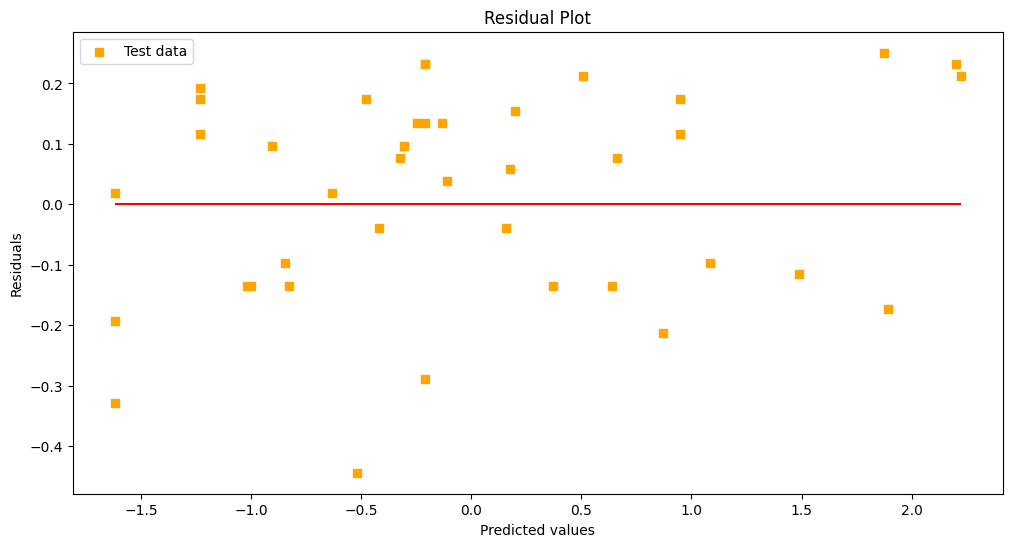

In [89]:
# Residual plot
plt.figure(figsize=(12, 6))
plt.scatter(y_decision_pred,(y_decision_pred - y_test), c='orange', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=y_decision_pred.min(), xmax=y_decision_pred.max(), color='red')
plt.title('Residual Plot')
plt.show()

**Predicted vs Actual plot**

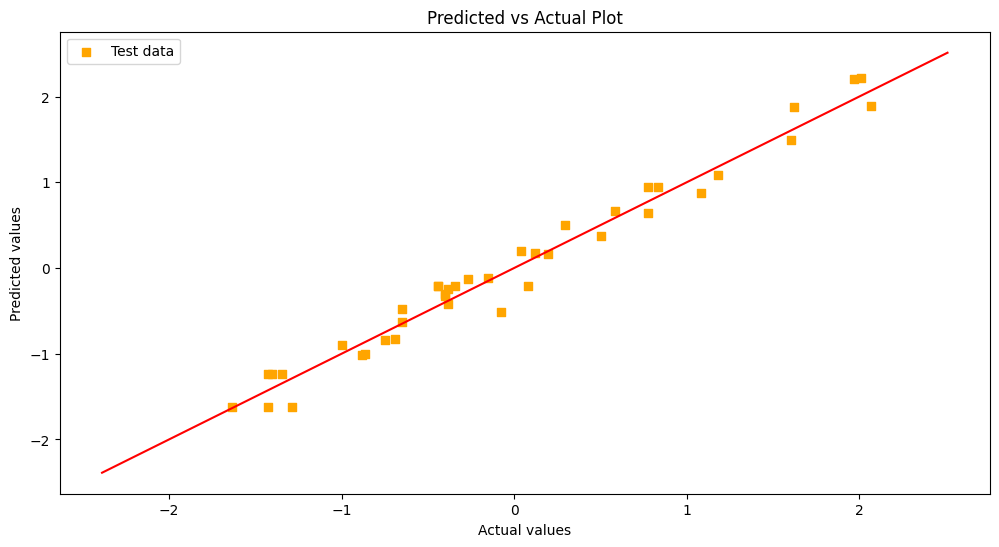

In [90]:
# Predicted vs Actual plot
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_decision_pred, c='orange', marker='s', label='Test data')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend(loc='upper left')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.title('Predicted vs Actual Plot')
plt.show()

# **Random Forest Regressor**

In [91]:
random_model = RandomForestRegressor()

random_model.fit(X_train, y_train)

y_random_pred = random_model.predict(X_test)

<ipython-input-91-bf93474fa3dc>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_model.fit(X_train, y_train)


In [92]:
y_random_pred

array([-1.05302934, -0.16627723,  1.79688698, -0.67351641, -1.50778885,
        1.77199773,  1.05233163, -0.31098221,  0.29793635,  0.07605538,
        0.08087888,  1.66877484, -1.59596242, -0.07231546, -0.93958063,
       -0.72889018, -1.56798612, -0.46089656, -0.79333213, -0.38179117,
       -0.12383043,  0.70446087,  2.12064026, -1.30828892,  0.62940722,
        1.5763566 , -1.21760713, -0.36577716, -1.27027974, -0.25483667,
        0.85302464,  0.12679859, -0.92800423, -0.21374046, -0.33046914,
        0.98248736,  0.24140493, -0.26506249,  0.98248736,  0.48856104])

In [93]:
y_random_pred = y_random_pred.reshape(-1,1)

In [94]:
mse_rf = mean_squared_error(y_test, y_random_pred)

r2_rf = r2_score(y_test, y_random_pred)

print(f'Random Forest - MSE: {mse_rf}, R2: {r2_rf}')

Random Forest - MSE: 0.016377123511370224, R2: 0.9837798868860861


**Residual Plot**

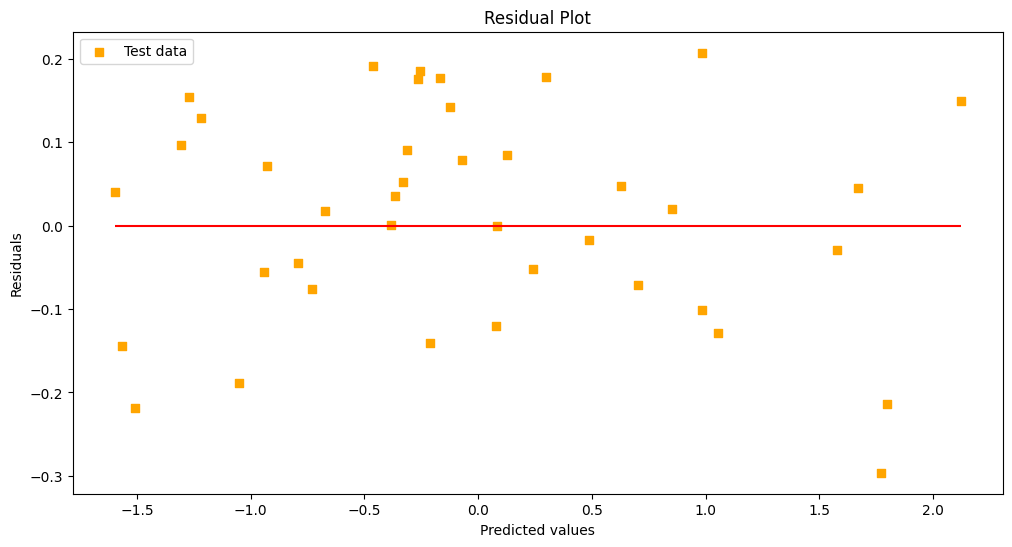

In [95]:
# Residual plot
plt.figure(figsize=(12, 6))
plt.scatter(y_random_pred,(y_random_pred - y_test), c='orange', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=y_random_pred.min(), xmax=y_random_pred.max(), color='red')
plt.title('Residual Plot')
plt.show()

**Predicted vs Actual plot**

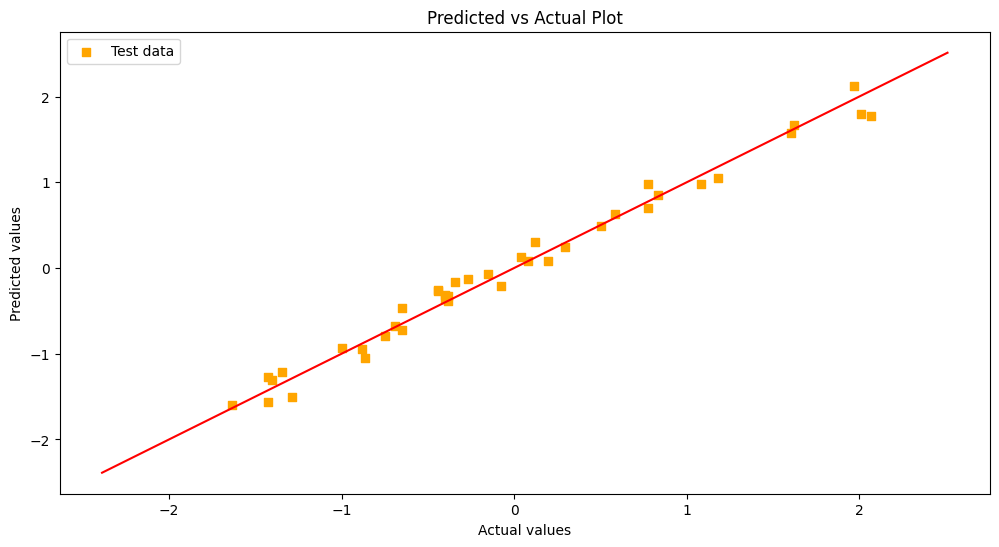

In [96]:
# Predicted vs Actual plot
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_random_pred, c='orange', marker='s', label='Test data')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend(loc='upper left')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.title('Predicted vs Actual Plot')
plt.show()

# **Support Vector Regression (SVR)**

In [97]:
svr = SVR(kernel='linear')

svr.fit(X_train, y_train)

y_svr_pred = svr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [98]:
y_svr_pred

array([-0.80867847, -0.31583662,  1.75297193, -0.9023561 , -0.50234328,
        1.58850517,  1.0268428 , -0.40794024,  0.09645323,  0.70044541,
        0.09043131,  1.3607249 , -0.85973873, -0.16445151, -1.31338566,
       -0.86767767, -0.45855387, -0.26031554, -0.65274334, -0.3402055 ,
       -0.06273991,  0.6918036 ,  1.70514386, -1.35878744,  0.64741567,
        1.38349032, -0.99796347,  0.06938918, -1.2114049 , -0.30182207,
        0.76150704,  0.04842761, -1.31429299,  0.22383682,  0.2755822 ,
        0.90634274,  0.29193774, -0.35000308,  0.81527374,  0.47429483])

In [99]:
y_svr_pred = y_svr_pred.reshape(-1,1)

In [100]:
mse_svr = mean_squared_error(y_test, y_svr_pred)

r2_svr = r2_score(y_test, y_random_pred)

print(f'Random Forest - MSE: {mse_svr}, R2: {r2_svr}')

Random Forest - MSE: 0.1123155136109876, R2: 0.9837798868860861


**Residual Plot**

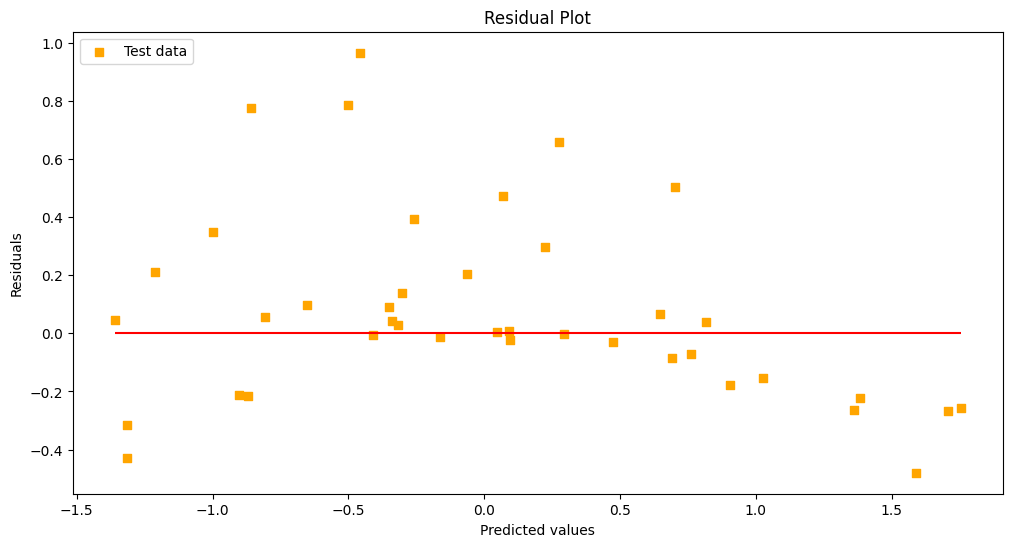

In [101]:
# Residual plot
plt.figure(figsize=(12, 6))
plt.scatter(y_svr_pred,(y_svr_pred - y_test), c='orange', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=y_svr_pred.min(), xmax=y_svr_pred.max(), color='red')
plt.title('Residual Plot')
plt.show()

**Predicted vs Actual plot**

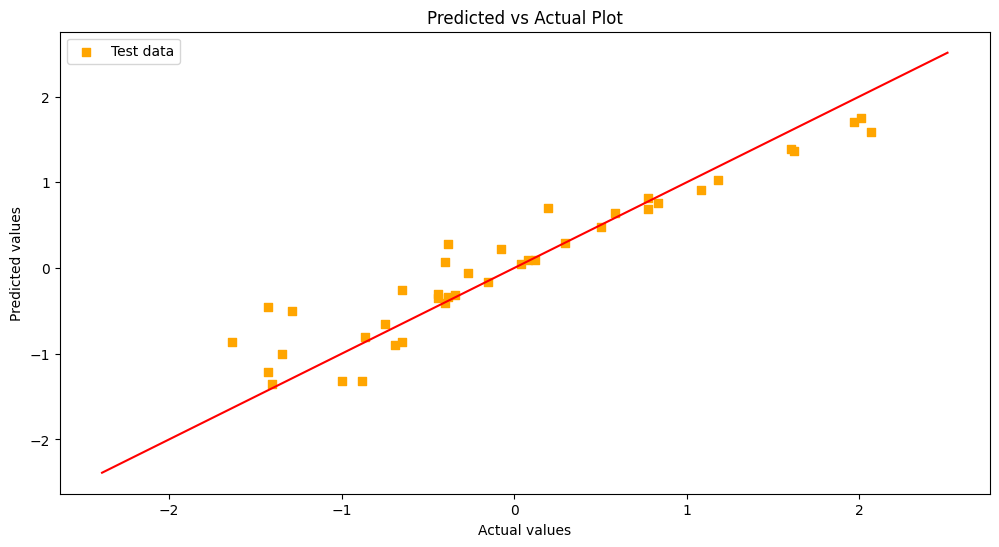

In [102]:
# Predicted vs Actual plot
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_svr_pred, c='orange', marker='s', label='Test data')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend(loc='upper left')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.title('Predicted vs Actual Plot')
plt.show()

# **LSTM**

In [103]:
# Split the data into training and testing sets
scaler = StandardScaler()
scaled_data=scaler.fit_transform(data)
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

In [104]:
# Reshape the data to fit the LSTM model requirements
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), :]
        X.append(a)
        Y.append(dataset[i + look_back, 3])  # 'Sales' is the target variable
    return np.array(X), np.array(Y)

In [105]:
look_back =  3
lstm_X_train, lstm_y_train = create_dataset(train_data, look_back)
lstm_X_test, lstm_y_test = create_dataset(test_data, look_back)

In [106]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(100, input_shape=(look_back, len(data.columns))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [107]:
# Train the model
model.fit(lstm_X_train, lstm_y_train, epochs=150, batch_size=1, verbose=2)

Epoch 1/150
154/154 - 2s - loss: 1.0280 - 2s/epoch - 16ms/step
Epoch 2/150
154/154 - 1s - loss: 0.9733 - 563ms/epoch - 4ms/step
Epoch 3/150
154/154 - 1s - loss: 0.9540 - 557ms/epoch - 4ms/step
Epoch 4/150
154/154 - 1s - loss: 0.9452 - 555ms/epoch - 4ms/step
Epoch 5/150
154/154 - 1s - loss: 0.9129 - 569ms/epoch - 4ms/step
Epoch 6/150
154/154 - 1s - loss: 0.8893 - 548ms/epoch - 4ms/step
Epoch 7/150
154/154 - 1s - loss: 0.8718 - 582ms/epoch - 4ms/step
Epoch 8/150
154/154 - 1s - loss: 0.8505 - 567ms/epoch - 4ms/step
Epoch 9/150
154/154 - 1s - loss: 0.8325 - 560ms/epoch - 4ms/step
Epoch 10/150
154/154 - 1s - loss: 0.8204 - 565ms/epoch - 4ms/step
Epoch 11/150
154/154 - 1s - loss: 0.7963 - 587ms/epoch - 4ms/step
Epoch 12/150
154/154 - 1s - loss: 0.7868 - 599ms/epoch - 4ms/step
Epoch 13/150
154/154 - 1s - loss: 0.7518 - 704ms/epoch - 5ms/step
Epoch 14/150
154/154 - 1s - loss: 0.7417 - 996ms/epoch - 6ms/step
Epoch 15/150
154/154 - 1s - loss: 0.7066 - 950ms/epoch - 6ms/step
Epoch 16/150
154/154 

In [108]:
# Make predictions
y_lstm_pred = model.predict(lstm_X_test)

2/2 [==============================] - 1s 10ms/step


In [109]:
y_lstm_pred

array([[-0.7872331 ],
       [ 1.4308202 ],
       [-0.09012579],
       [ 0.8973425 ],
       [ 0.60612804],
       [-0.29297534],
       [ 0.30287746],
       [-0.41496053],
       [-0.30728143],
       [-0.06681036],
       [-0.05834116],
       [-0.28226173],
       [ 1.1527016 ],
       [-0.26775473],
       [-0.8389327 ],
       [-0.1750356 ],
       [-1.2607689 ],
       [-0.6959658 ],
       [ 0.10414498],
       [-0.17699307],
       [-0.6592449 ],
       [ 1.0765653 ],
       [-1.0382617 ],
       [-0.38155574],
       [-0.49469516],
       [-0.12787655],
       [-0.73105866],
       [ 0.5005    ],
       [ 0.7080319 ],
       [ 1.1804266 ],
       [ 1.0064578 ],
       [ 1.8195244 ],
       [ 1.3899323 ],
       [ 0.9019415 ],
       [ 0.91990215],
       [ 0.4253695 ]], dtype=float32)

In [110]:
lstm_y_test = lstm_y_test.reshape(-1,1)

In [111]:
# Calculate evaluation metrics
lstm_mse = mean_squared_error(lstm_y_test, y_lstm_pred)
lstm_rmse = np.sqrt(lstm_mse)
lstm_r2 = r2_score(lstm_y_test, y_lstm_pred)


In [112]:
print(f'Train MSE: {lstm_mse:.2f}')
print(f'Train RMSE: {lstm_rmse:.2f}')
print(f'Train R2: {lstm_r2:.2f}')

Train MSE: 2.06
Train RMSE: 1.43
Train R2: -1.18


**Residual Plot**

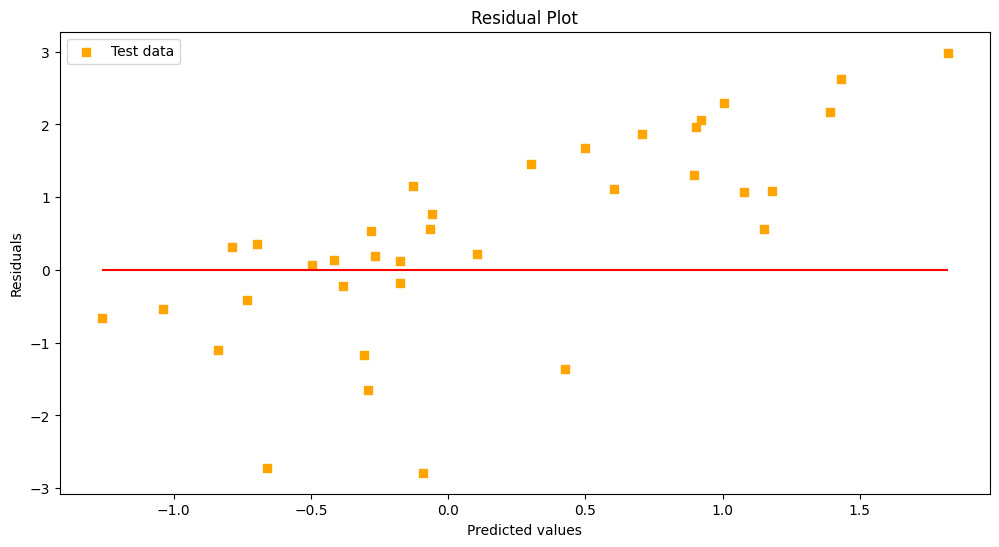

In [113]:
# Residual plot
plt.figure(figsize=(12, 6))
plt.scatter(y_lstm_pred,(y_lstm_pred - lstm_y_test), c='orange', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=y_lstm_pred.min(), xmax=y_lstm_pred.max(), color='red')
plt.title('Residual Plot')
plt.show()

**Predicted vs Actual plot**

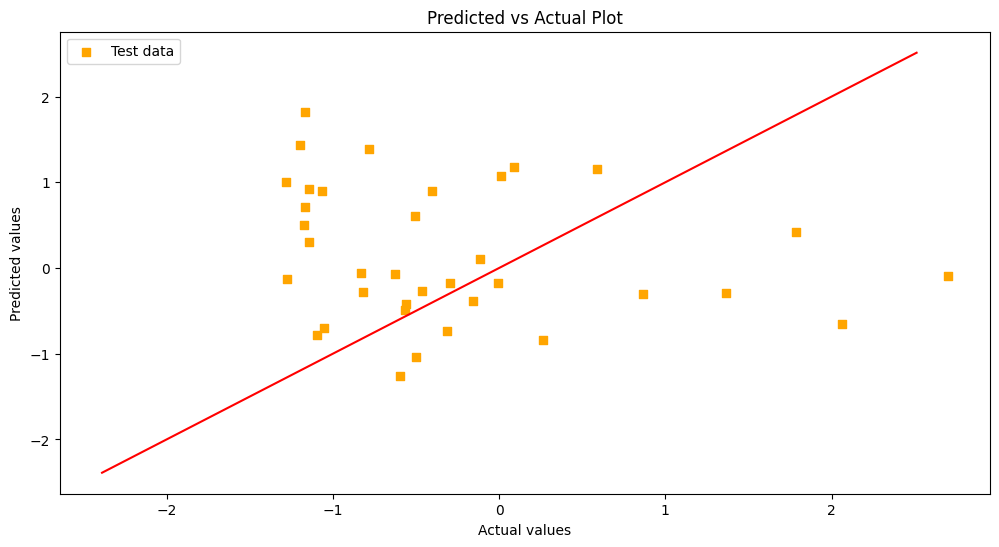

In [114]:
# Predicted vs Actual plot
plt.figure(figsize=(12, 6))
plt.scatter(lstm_y_test, y_lstm_pred, c='orange', marker='s', label='Test data')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend(loc='upper left')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.title('Predicted vs Actual Plot')
plt.show()

**Comaprison of Models**

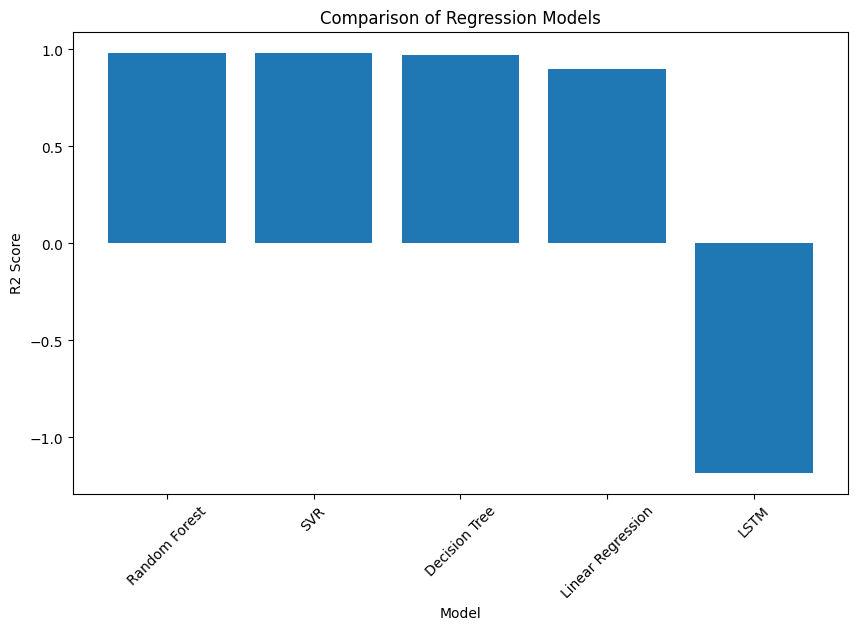

In [115]:

# Create a dictionary to store model names and their MSE values
models_r2 = {
    "Linear Regression": r2_lr,
    "Decision Tree": r2_dt,
    "Random Forest": r2_rf,
    "LSTM" : lstm_r2,
    "SVR": r2_svr
}

# Sort models by descending order of accuracy
sorted_models_r2 = dict(sorted(models_r2.items(), key=lambda item: item[1],reverse = True))

# Plot the comparison
plt.figure(figsize=(10, 6))
plt.bar(sorted_models_r2.keys(), sorted_models_r2.values())
plt.title('Comparison of Regression Models')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)
plt.show()


## **NEW PREDICTIONS WITH RANDOM FORESR REGRESSOR**





**Testing for New Inputs**

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  198 non-null    int64  
 1   TV          198 non-null    float64
 2   Radio       198 non-null    float64
 3   Newspaper   198 non-null    float64
 4   Sales       198 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 9.3 KB


In [117]:
import numpy as np

# Given inputs
#inputs = np.array([TV, Radio, NewsPaper])
inputs = np.array([155,50,85])


In [118]:
new_inputs = scalerx.transform(inputs.reshape(1, -1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**Prediction**

In [119]:
new_pred = random_model.predict(new_inputs).reshape(-1,1)

In [120]:
n_pred = scalery.inverse_transform(new_pred)

In [121]:
print("Sales Prediction : ", n_pred[0][0] )

Sales Prediction :  19.430999999999994
